In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [2]:
type(data)


dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982153e+07,1.982153e+07,False,NaN,1,NaN,NaN,None,2025-02-08T13:52:00.000Z,96333.245040,4.881542e+10,4.0806,0.311018,-2.439396,-5.554734,4.632256,-1.530632,20.718710,1.909472e+12,60.7328,2.022998e+12,None,2025-02-08T13:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:26.308933
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205333e+08,1.205333e+08,True,NaN,2,NaN,NaN,None,2025-02-08T13:51:00.000Z,2630.081804,2.842417e+10,-3.2573,1.077809,-5.253907,-18.940436,-18.794258,-28.931328,-17.955034,3.170124e+11,10.0816,3.170124e+11,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:26.308933
2,825,Tether USDt,USDT,tether,115843,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.416646e+11,1.435706e+11,True,NaN,3,NaN,NaN,None,2025-02-08T13:52:00.000Z,0.999957,9.593591e+10,-4.9731,-0.030659,-0.037493,0.011831,0.044913,-0.057253,-0.061340,1.416585e+11,4.5050,1.435644e+11,None,2025-02-08T13:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-08 15:53:26.308933
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.776255e+10,9.998650e+10,False,NaN,4,NaN,NaN,None,2025-02-08T13:51:00.000Z,2.427343,7.734899e+09,-5.4500,1.198719,-0.472904,-18.660477,8.041301,11.852082,300.236102,1.402095e+11,4.4597,2.427343e+11,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:26.308933
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.878291e+08,5.936683e+08,True,NaN,5,NaN,NaN,None,2025-02-08T13:51:00.000Z,195.871755,3.752248e+09,-16.8546,1.268488,-1.830365,-13.908398,5.188016,-8.724228,-4.921527,9.555194e+10,3.0387,1.162829e+11,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:26.308933
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424801e+08,1.424801e+08,False,NaN,6,NaN,NaN,None,2025-02-08T13:51:00.000Z,597.524238,1.579937e+09,-5.5412,2.189657,1.898675,-10.746424,-13.335739,-13.108542,-6.230463,8.513532e+10,2.7077,8.513532e+10,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:26.308933
6,3408,USDC,USDC,usd-coin,25548,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.612040e+10,5.612040e+10,False,NaN,7,NaN,NaN,None,2025-02-08T13:51:00.000Z,0.999963,8.249806e+09,-12.1204,-0.028379,0.003175,-0.009403,-0.006539,0.000402,0.004307,5.611834e+10,1.7847,5.611834e+10,None,2025-02-08T13:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-08 15:53:26.308933
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.479607e+11,1.479607e+11,True,NaN,8,NaN,NaN,None,2025-02-08T13:52:00.000Z,0.250613,1.693361e+09,-19.2936,1.350889,-3.054571,-22.291646,-21.988881,-37.664550,1.504309,3.708091e+10,1.1792,3.708091e+10,None,2025-02-08T13:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:26.308933
8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.

In [5]:
import requests
import pandas as pd
import json
import os
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import sleep

# ✅ Initialize an empty DataFrame globally
df = pd.DataFrame()

# ✅ Define CSV path
csv_path = r'C:\Users\Sanni Kangasvieri\Creative Cloud Files\API.csv'

def api_runner():
    global df  # Ensure we update the global DataFrame

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

    parameters = {'start': '1', 'limit': '15', 'convert': 'USD'}
    
    headers = {'Accepts': 'application/json', 'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'}

    session = requests.Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = response.json()

        print("🔍 API Response:", data)  # ✅ Debugging API response

        if 'data' not in data:
            print("❌ API Error:", data)
            return  # Exit function if there's an error

        # ✅ Extract cryptocurrency data and normalize JSON
        df2 = pd.json_normalize(data['data'])
        df2['Timestamp'] = pd.to_datetime('now')

        # ✅ Use pd.concat() instead of append (append is deprecated)
        df = pd.concat([df, df2], ignore_index=True)

        # ✅ Save after each API call
        df.to_csv(csv_path, index=False)
        print(f"✅ Data saved to {csv_path}")

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print("❌ Connection Error:", e)

# ✅ Run API call every 60 seconds, 3 times for testing (change to 333 later)
for i in range(3):
    api_runner()
    print(f'API Runner completed {i+1}/3')
    sleep(60)

# ✅ Final check if file exists
if os.path.exists(csv_path):
    print(f"✅ Final check: Data saved successfully to {csv_path}")
else:
    print("❌ Error: CSV file was not created!")


🔍 API Response: {'status': {'timestamp': '2025-02-08T13:53:27.872Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 10826}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11928, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-

In [7]:
import pandas as pd

csv_path = r'C:\Users\Sanni Kangasvieri\Creative Cloud Files\API.csv'

try:
    # ✅ Read the CSV file
    df72 = pd.read_csv(csv_path)

    # ✅ Print confirmation message
    print(f"✅ File loaded successfully from: {csv_path}")

    # ✅ Display DataFrame info
    print("\n🔹 DataFrame Info:")
    print(df72.info())

    # ✅ Show the first few rows
    print("\n🔹 First 5 Rows:")
    print(df72.head())

except FileNotFoundError:
    print(f"❌ Error: CSV file not found at {csv_path}. Please check the path.")
except pd.errors.EmptyDataError:
    print("❌ Error: CSV file is empty.")
except Exception as e:
    print(f"❌ Unexpected Error: {e}")


✅ File loaded successfully from: C:\Users\Sanni Kangasvieri\Creative Cloud Files\API.csv

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  45 non-null     int64  
 1   name                                45 non-null     object 
 2   symbol                              45 non-null     object 
 3   slug                                45 non-null     object 
 4   num_market_pairs                    45 non-null     int64  
 5   date_added                          45 non-null     object 
 6   tags                                45 non-null     object 
 7   max_supply                          18 non-null     float64
 8   circulating_supply                  45 non-null     float64
 9   total_supply                        45 non-null     float64
 10  infi

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [9]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19821531.00000,19821531.00000,False,NaN,1,NaN,NaN,None,2025-02-08T13:52:00.000Z,96333.24504,48815415016.11720,4.08060,0.31102,-2.43940,-5.55473,4.63226,-1.53063,20.71871,1909472402896.22852,60.73280,2022998145845.59009,None,2025-02-08T13:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:29.513883
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120533298.03714,120533298.03714,True,NaN,2,NaN,NaN,None,2025-02-08T13:51:00.000Z,2630.08180,28424170672.24885,-3.25730,1.07781,-5.25391,-18.94044,-18.79426,-28.93133,-17.95503,317012433972.52759,10.08160,317012433972.53003,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:29.513883
2,825,Tether USDt,USDT,tether,115843,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141664621553.59421,143570570332.03564,True,NaN,3,NaN,NaN,None,2025-02-08T13:52:00.000Z,0.99996,95935908052.15536,-4.97310,-0.03066,-0.03749,0.01183,0.04491,-0.05725,-0.06134,141658539400.51453,4.50500,143564406349.97000,None,2025-02-08T13:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-08 15:53:29.513883
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,None,2025-02-08T13:51:00.000Z,2.42734,7734898721.71025,-5.45000,1.19872,-0.47290,-18.66048,8.04130,11.85208,300.23610,140209503687.68292,4.45970,242734287578.42999,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:29.513883
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487829075.91638,593668290.03375,True,NaN,5,NaN,NaN,None,2025-02-08T13:51:00.000Z,195.87176,3752247574.69327,-16.85460,1.26849,-1.83036,-13.90840,5.18802,-8.72423,-4.92153,95551937377.34361,3.03870,116282850024.17999,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:29.513883
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480111.37000,142480111.37000,False,NaN,6,NaN,NaN,None,2025-02-08T13:51:00.000Z,597.52424,1579936957.26053,-5.54120,2.18966,1.89868,-10.74642,-13.33574,-13.10854,-6.23046,85135319942.50032,2.70770,85135319942.50000,None,2025-02-08T13:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 15:53:29.513883
6,3408,USDC,USDC,usd-coin,25548,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56120395289.22514,56120395289.22514,False,NaN,7,NaN,NaN,None,2025-02-08T13:51:00.000Z,0.99996,8249805898.08371,-12.12040,-0.02838,0.00317,-0.00940,-0.00654,0.00040,0.00431,56118337145.72031,1.78470,56118337145.72000,None,2025-02-08T13:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-08 15:53:29.513883
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147960706383.70526,147960706383.70526,True,NaN,8,NaN,NaN,None,2025-02-08T13:52:00.000Z,0.25061,1693360938.79865,-19.29360,1.35089,-3.05457,-22.29165,-21.98888,-37.66455,1.50431,37080909927.50401,1.17920,37080909927.50000,None,2025-02-08T13:5

In [10]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.30995,-2.43222,-5.54182,4.59655,-1.52452,20.71981
Ethereum,1.05914,-5.32225,-18.98788,-18.74371,-28.94825,-18.03329
Tether USDt,0.01009,-0.01648,0.03063,0.06548,-0.03213,-0.04770
XRP,1.20549,-0.81998,-18.64647,8.10924,11.84276,300.08602
Solana,1.24247,-1.99131,-13.91360,5.21387,-8.75992,-4.98562
BNB,2.11962,1.81425,-10.75812,-13.31167,-13.14432,-6.32414
USDC,-0.00685,0.00836,0.00358,0.01353,0.00217,0.01575
Dogecoin,1.31653,-3.04718,-22.30333,-21.88023,-37.64462,1.67488
Cardano,1.28273,-5.71510,-24.85561,-21.30970,-30.04319,12.43534


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.30995
             quote.USD.percent_change_24h    -2.43222
             quote.USD.percent_change_7d     -5.54182
             quote.USD.percent_change_30d     4.59655
             quote.USD.percent_change_60d    -1.52452
             quote.USD.percent_change_90d    20.71981
Ethereum     quote.USD.percent_change_1h      1.05914
             quote.USD.percent_change_24h    -5.32225
             quote.USD.percent_change_7d    -18.98788
             quote.USD.percent_change_30d   -18.74371
             quote.USD.percent_change_60d   -28.94825
             quote.USD.percent_change_90d   -18.03329
Tether USDt  quote.USD.percent_change_1h      0.01009
             quote.USD.percent_change_24h    -0.01648
             quote.USD.percent_change_7d      0.03063
             quote.USD.percent_change_30d     0.06548
             quote.USD.percent_change_60d    -0.03213
             quote.USD.percent_change_90

In [12]:
type(df4)


pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.30995
            quote.USD.percent_change_24h  -2.43222
            quote.USD.percent_change_7d   -5.54182
            quote.USD.percent_change_30d   4.59655
            quote.USD.percent_change_60d  -1.52452
            quote.USD.percent_change_90d  20.71981
Ethereum    quote.USD.percent_change_1h    1.05914
            quote.USD.percent_change_24h  -5.32225
            quote.USD.percent_change_7d  -18.98788
            quote.USD.percent_change_30d -18.74371
            quote.USD.percent_change_60d -28.94825
            quote.USD.percent_change_90d -18.03329
Tether USDt quote.USD.percent_change_1h    0.01009
            quote.USD.percent_change_24h  -0.01648
            quote.USD.percent_change_7d    0.03063
            quote.USD.percent_change_30d   0.06548
            quote.USD.percent_change_60d  -0.03213
            quote.USD.percent_change_90d  -0.04770
XRP         quote.USD.percent_change_1h    1.20549
            quote.USD.percent_change_24h  -0.81998
            quote.USD.percent_change_7d  -18.64647
            quote.USD.percent_change_30d   8.10924
            quote.USD.percent_change_60d  11.84276
            quote.USD.percent_change_90d 300.08602
Solana      quote.USD.percent_change_1h    1.24247
            quote.USD.percent_change_24h  -1.99131
            quote.USD.percent_change_7d  -13.91360
            quote.USD.percent_change_30d   5.21387
            quote.USD.percent_change_60d  -8.75992
            quote.USD.percent_change_90d  -4.98562
BNB         quote.USD.percent_change_1h    2.11962
            quote.USD.percent_change_24h   1.81425
            quote.USD.percent_change_7d  -10.75812
            quote.USD.percent_change_30d -13.31167
            quote.USD.percent_change_60d -13.14432
            quote.USD.percent_change_90d  -6.32414
USDC        quote.USD.percent_change_1h   -0.00685
            quote.USD.percent_change_24h   0.00836
            quote.USD.percent_change_7d    0.00358
            quote.USD.percent_change_30d   0.01353
            quote.USD.percent_change_60d   0.00217
            quote.USD.percent_change_90d   0.01575
Dogecoin    quote.USD.percent_change_1h    1.31653
            quote.USD.percent_change_24h  -3.04718
            quote.USD.percent_change_7d  -22.30333
            quote.USD.percent_change_30d -21.88023
            quote.USD.percent_change_60d -37.64462
            quote.USD.percent_change_90d   1.67488
Cardano     quote.USD.percent_change_1h    1.28273
            quote.USD.percent_change_24h  -5.71510
            quote.USD.percent_change_7d  -24.85561
            quote.USD.percent_change_30d -21.30970
            quote.USD.percent_change_60d -30.04319
            quote.USD.percent_change_90d  12.43534
TRON        quote.USD.percent_change_1h   -0.39132
            quote.USD.percent_change_24h   1.16630
            quote.USD.percent_change_7d   -8.52711
            quote.USD.percent_change_30d  -3.81675
            quote.USD.percent_change_60d -13.69242
            quote.USD.percent_change_90d  39.86119
Chainlink   quote.USD.percent_change_1h    1.31133
            quote.USD.percent_change_24h  -7.06328
            quote.USD.percent_change_7d  -26.01267
            quote.USD.percent_change_30d  -6.33809
            quote.USD.percent_change_60d -20.16474
            quote.USD.percent_change_90d  23.72325
Avalanche   quote.USD.percent_change_1h    1.57079
            quote.USD.percent_change_24h  -5.42445
            quote.USD.percent_change_7d  -27.64926
            quote.USD.percent_change_30d -31.98307
            quote.USD.percent_change_60d -45.75040
            quote.USD.percent_change_90d -24.96873
Stellar     quote.USD.percent_change_1h    1.44553
            quote.USD.percent_change_24h  -2.60532
            quote.USD.percent_change_7d  -19.29051
            quote.USD.percent_change_30d -16.11380
            quote.USD.percent_change_60d -18.59359
            quo

In [14]:

index = pd.Index(range(90))


# using set_index() function
df6 = df5.set_index(index)
df6


,values
0,0.30995
1,-2.43222
2,-5.54182
3,4.59655
4,-1.52452
5,20.71981
6,1.05914
7,-5.32225
8,-18.98788
9,-18.74371


In [15]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,0.30995
1,-2.43222
2,-5.54182
3,4.59655
4,-1.52452
5,20.71981
6,1.05914
7,-5.32225
8,-18.98788
9,-18.74371


In [28]:
df7 = df7.rename(columns={
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})

print("✅ Columns renamed successfully!")
print(df7.head())  # Check if changes are applied



✅ Columns renamed successfully!
    values
0  0.30995
1 -2.43222
2 -5.54182
3  4.59655
4 -1.52452


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
print("🔍 API Response Data:")
print(data)  # Ensure 'data' contains percentage change fields




🔍 API Response Data:
{'status': {'timestamp': '2025-02-08T13:53:22.856Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 10826}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11928, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-cap

In [35]:
import pandas as pd

# Extract only the 'data' field from API response
df7 = pd.json_normalize(data['data'])

print("✅ DataFrame Columns:")
print(df7.columns)
print(df7.head())  # Check the first few rows


✅ DataFrame Columns:
Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')
     id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin          

In [36]:
df7 = df7.rename(columns={
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})

print("✅ Columns renamed successfully!")
print(df7.head())


✅ Columns renamed successfully!
     id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11928   
1  1027     Ethereum    ETH  ethereum              9919   
2   825  Tether USDt   USDT    tether            115843   
3    52          XRP    XRP       xrp              1525   
4  5426       Solana    SOL    solana               837   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2013-08-04T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags         max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...     21000000.00000   
1  [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2  [stablecoin, asset-backed-stablecoin, ethereum...                NaN   
3  [medium-of-exchange, enterprise-solutions, xrp... 100000000000.00000   
4  [pos, platform, solana-ecosystem, cms-holdings..

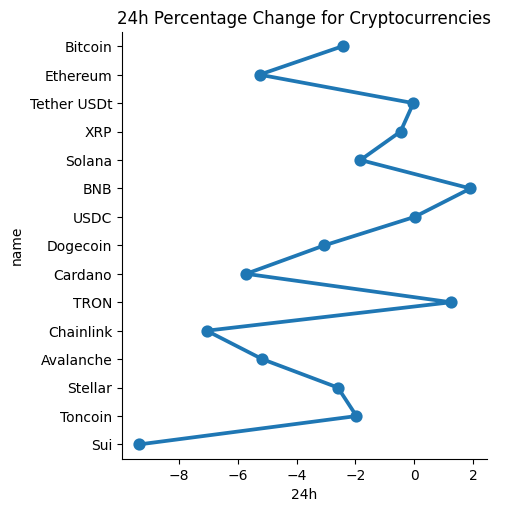

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='24h', y='name', data=df7, kind='point')
plt.title("24h Percentage Change for Cryptocurrencies")
plt.show()


In [39]:

df10 = df7[['name', 'quote.USD.price']].copy()


df10['timestamp'] = pd.to_datetime('now')

# filter for Bitcoin
df10 = df10[df10['name'] == 'Bitcoin']

print(df10)


      name  quote.USD.price                  timestamp
0  Bitcoin      96333.24504 2025-02-08 16:08:42.254199


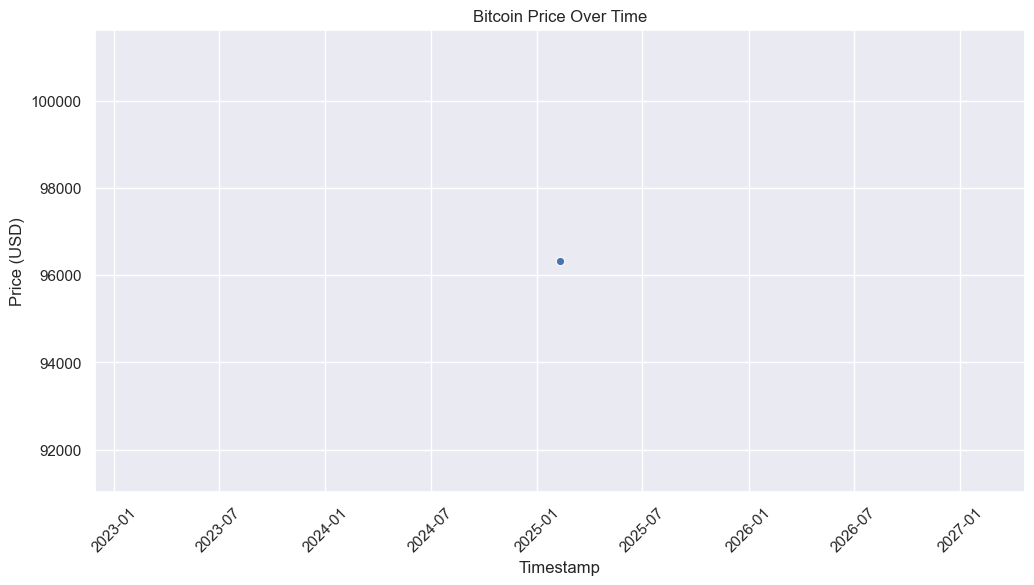

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

df10 = df10.rename(columns={'quote.USD.price': 'price'})

df10['timestamp'] = pd.to_datetime(df10['timestamp'])

df10 = df10.sort_values(by='timestamp')

if df10.empty:
    print("❌ No Bitcoin data available for plotting.")
else:
    sns.set_theme(style="darkgrid")

    plt.figure(figsize=(12,6))
    sns.lineplot(x='timestamp', y='price', data=df10, marker='o', linewidth=2)

    #  Improve formatting
    plt.xticks(rotation=45)  # Rotate timestamps for better readability
    plt.title("Bitcoin Price Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USD)")
    
    plt.show()
